In [5]:
import numpy as np
import pandas as pd

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Applying Binning

In [18]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [29]:
clf = DecisionTreeClassifier()

np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

0.6317488262910798

# With Binning

In [32]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [33]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [34]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [38]:
trf.named_transformers_['first'].n_bins_

array([10])

In [41]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [42]:
output_df = pd.DataFrame({
    'Age' : X_train['Age'],
    'Age_trf' : X_train_transformed[:, 0],
    'Fare' : X_train['Fare'],
    'Fare_trf' : X_train_transformed[:, 1]
})

In [45]:
output_df

,Age,Age_trf,Fare,Fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [80]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[0.42, 14.0, 19.0, 22.0, 25.0, 28.0, 31.80000000000001, 36.0, 41.0, 50.0, 80.0]

In [81]:
clf = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

In [82]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [83]:
clf = DecisionTreeClassifier()

X_tranformed = trf.fit_transform(X)

np.mean(cross_val_score(clf, X_tranformed, y, cv=10, scoring='accuracy'))

0.682140062597809

In [109]:
def descritize(bins=10, strategy='quantile'):
    kbin_height = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_weight = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_height, [0]),
        ('second', kbin_weight, [1])
    ])

    X_transformed = trf.fit_transform(X)

    print(np.mean(cross_val_score(DecisionTreeClassifier(), X_transformed, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Height'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_transformed[:, 0], color='red')
    plt.title('After')

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Weight'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_transformed[:, 1], color='red')
    plt.title('After')

0.9111


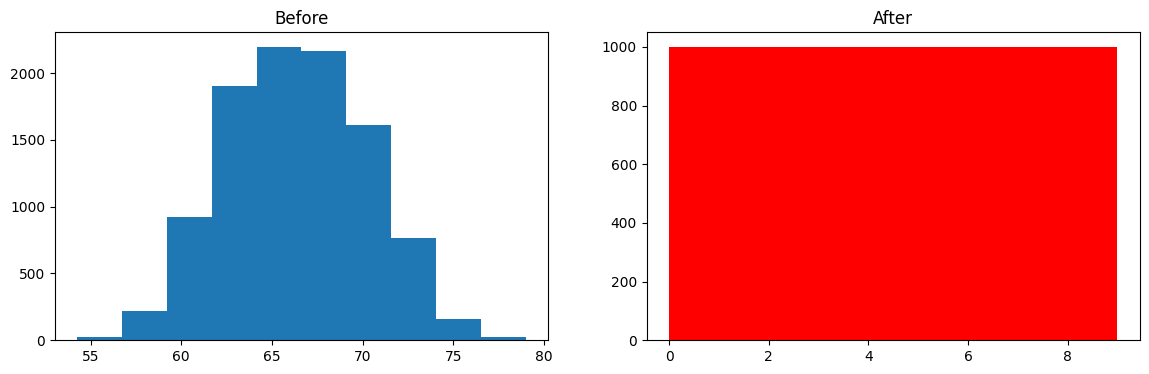

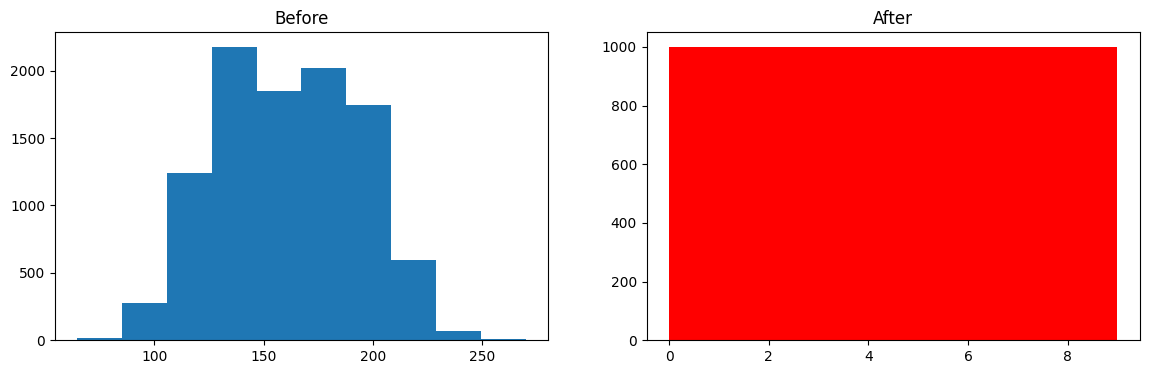

In [110]:
descritize()

In [104]:
df2 = pd.read_csv('weight-height.csv')

In [105]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [106]:
X, y = df2.drop(['Gender'], axis=1), df2['Gender']

In [108]:
X

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461
